In [223]:
# Case Study Setup
import numpy as np
import random
import scipy.stats as ss


def majority_vote_fast(votes):
    mode, count = ss.mstats.mode(votes)
    return mode


def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))


def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]


def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

In [224]:
import pandas as pd

# read and take a glance at the dataset
df = pd.read_csv('wines.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [225]:
df.tail()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1
6496,4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,1


In [226]:
red_wines = [1 if wine == 'red' else 0 for wine in df['color']]
print(f"white: {red_wines.count(0)}\nred: {red_wines.count(1)}")
df['color'].value_counts()

white: 4898
red: 1599


white    4898
red      1599
Name: color, dtype: int64

In [227]:
numerical_data = df.drop(['color'], axis=1)
numerical_data.insert(len(df.columns)-2, 'is_red', value=red_wines)
numerical_data = numerical_data.loc[:, 'fixed acidity':'high_quality']

In [228]:
numerical_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,1


In [229]:
# Z-score normalization
# calcultate z score or each attribute/feature/col
numerical_data.groupby('is_red')['is_red'].count()

is_red
0    4898
1    1599
Name: is_red, dtype: int64

In [230]:
# Homemade Z-score Normalization
normalized_data = (numerical_data.loc[:, 'fixed acidity':'is_red'] -
                   numerical_data.loc[:, 'fixed acidity':'is_red'].mean()
                   ) / numerical_data.loc[:, 'fixed acidity':'is_red'].std()
normalized_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,1.750055
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157,1.750055
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157,1.750055
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983,1.750055
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,1.750055


In [231]:
# Normalization or scaling using sklearn
from sklearn.preprocessing import scale
scaled_data = scale(numerical_data)
numeric_data = pd.DataFrame(scaled_data, columns=numerical_data.columns)
numeric_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.75019,-1.313488
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,1.75019,-1.313488
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,1.75019,-1.313488
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,1.75019,0.761331
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,1.75019,-1.313488


In [232]:
# Principal component analysis
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)
principal_components.shape

(6497, 2)

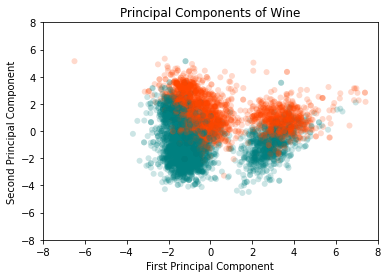

In [233]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['orangered', 'teal'])
x = principal_components[:, 0]
y = principal_components[:, 1]

fig = plt.figure()
plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha=0.2,
            c=df['high_quality'], cmap=observation_colormap, edgecolors='none')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()
fig.savefig("pca_scatterplot.pdf")

In [234]:
# the seeds makes it possible that I get the same random numbers every time I run the code
np.random.seed(1)

x = np.random.randint(0, 2, 1000)
y = np.random.randint(0 ,2, 1000)

def accuracy(predictions, outcomes):
    return 100 * np.mean(predictions == outcomes)

accuracy(x,y)

51.5

In [235]:
# if we predict every wine as low_quality
accuracy(0, df.high_quality)

36.69385870401724

In [236]:
# prediction using the sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(numeric_data, df.high_quality)
library_predictions = knn.predict(numeric_data)
accuracy(library_predictions, df.high_quality)

99.96921656148992

In [237]:
# Prediction Grid using sklearn knn.predict function
def make_prediction_grid_sklearn(limits, points, labels, k):
    """Returns coordinates of meshgrid and prediction_grid"""
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(points, labels)
    x_min, x_max, y_min, y_max, h = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    (xx, yy) = np.meshgrid(xs, ys)
    prediction_grid = np.zeros(xx.shape, dtype=int)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            prediction_grid[j, i] = knn.predict(np.array([x, y]).reshape(1,-1))

    return xx, yy, prediction_grid

def annotate(ax, xlab="X", ylab="Y", title="Figure", ticks=False):
    """Annotates a figure, ticks = tuple with xticks and yticks or a boolean"""
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    if not ticks:
        ax.set_xticks(())
        ax.set_yticks(())

def plot_prediction_grid(xx,
                         yy,
                         prediction_grid,
                         filename,
                         points,
                         labels,
                         xlab,
                         ylab,
                         title,
                         ticks=False):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    fg_cmap = ListedColormap(['teal', 'salmon'])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.pcolormesh(xx,
                  yy,
                  prediction_grid,
                  alpha=0.1,
                  shading="auto",
                  antialiased=True)
    ax.scatter(points[:, 0],
               points[:, 1],
               c=labels,
               cmap=fg_cmap,
               s=50,
               alpha=0.5)
    annotate(ax, xlab, ylab, title, ticks)
    ax.set_xlim(np.min(xx), np.max(xx))
    ax.set_ylim(np.min(yy), np.max(yy))
    fig.savefig(filename)

In [238]:
limits = (-8, 8, -8, 8, 0.1)
xx, yy, prediction_grid = make_prediction_grid_sklearn(limits, principal_components, df.high_quality, k=5)

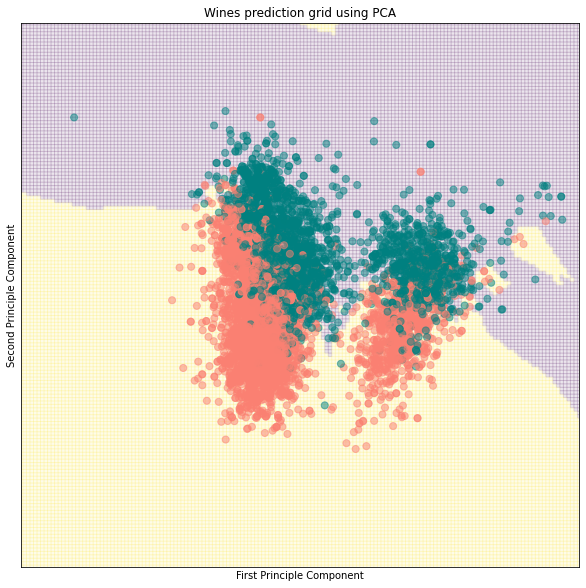

In [239]:
plot_prediction_grid(xx,
                     yy,
                     prediction_grid,
                     "wines_pca_grid.pdf",
                     points=principal_components,
                     labels=df.high_quality,
                     xlab='First Principle Component',
                     ylab='Second Principle Component',
                     title="Wines prediction grid using PCA")


In [240]:
# Randomly sampling 10 rows from the dataset to run our homemade KNN Classifier
import random
random.seed(123)
n_rows = df.shape[0]
selection = random.sample(range(n_rows), 10)
selection

[428, 2192, 714, 6299, 3336, 2183, 882, 312, 3105, 4392]

In [256]:
from knn import knn_predict
predictors = np.array(numeric_data)
outcomes = np.array(numeric_data.high_quality)
training_inds = [i for i in range(numeric_data.shape[0]) if i not in selection]
my_predictions = np.array([
    knn_predict(p, predictors[training_inds, :], outcomes, 5)
    for p in predictors[selection]
])
percentage = accuracy(my_predictions, numeric_data.high_quality[selection])
print(percentage)

50.0
